# Part 1 : Static Model 

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
seed_value = 42
np.random.seed(seed_value)

#### Importing the static dataset and removing whitespace for columns

In [46]:
static = pd.read_csv('Static_dataset.csv')
data = static.copy()
data.columns = [x.strip() for x in data.columns]
data.shape

(268074, 16)

#### Checking for null values in the dataset


In [47]:
nanrows = data[data.isna().any(axis=1)]
len(nanrows) # length of which was 8
len(nanrows)/len(data)*100 #percentage of null values in row

0.0029842506173668464

Drop NaN rows, print data types and split labels

In [48]:
data.dropna(inplace=True)
print(data.dtypes)
print(data['Target Attack'].unique())

timestamp            object
FQDN_count            int64
subdomain_length      int64
upper                 int64
lower                 int64
numeric               int64
entropy             float64
special               int64
labels                int64
labels_max            int64
labels_average      float64
longest_word         object
sld                  object
len                   int64
subdomain             int64
Target Attack         int64
dtype: object
[1 0]


### Validate Data Imbalance with justifications

This piece of code sheds light on the data imbalance with majority class being '1's (or Attacks) with 54% values. The rest of the values '0's are 46% of the total value

[1 0]
Percentage of attacks in dataset (1s) =  54.90401617512105 %
Percentage of attacks in dataset (0s) =  45.09598382487895 %




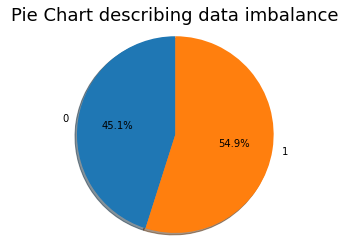

In [49]:
print(data['Target Attack'].unique())
zero_count = data['Target Attack'].value_counts()[0]
ones_count = data['Target Attack'].value_counts()[1]
print("Percentage of attacks in dataset (1s) = " , ones_count/len(data) * 100, "%")
print("Percentage of attacks in dataset (0s) = " , zero_count/len(data) * 100, "%")

print('\n')

labels = '0', '1'
sizes = [zero_count/len(data) * 100, ones_count/len(data) * 100]

fig1, ax1 = plt.subplots()
plt.title('Pie Chart describing data imbalance', fontsize=18)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

Count frequency plots have been drawn below to validate that random oversampler has worked and data is balanced

Total Observations =  268066 

 Number of attacks =  147179 
 Other observations =  120887


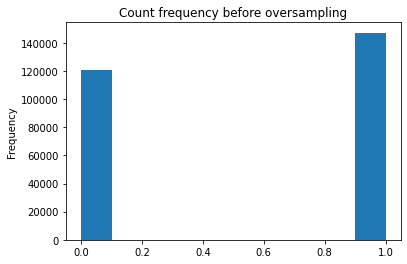

In [50]:
print("Total Observations = ", len(data), '\n\n', "Number of attacks = ", ones_count, '\n', "Other observations = ", zero_count)

data['Target Attack'].plot(kind='hist')
plt.title('Count frequency before oversampling')
plt.show()

In [51]:
from imblearn.over_sampling import RandomOverSampler

labels = data['Target Attack']
data = data.drop('Target Attack', axis=1)
num_cols =  data.select_dtypes('number')
cat_cols = data.select_dtypes('object')

rs = RandomOverSampler(random_state=seed_value)
data,labels = rs.fit_resample(data,labels)

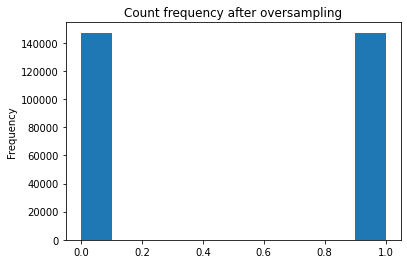

1    147179
0    147179
Name: Target Attack, dtype: int64

In [52]:
labels.plot(kind='hist')
plt.title('Count frequency after oversampling')
plt.show()

labels.value_counts()

### Statistical Analysis of data

In [53]:
data.describe()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain
count,294358.000000,294358.000000,294358.000000,294358.000000,294358.000000,294358.000000,294358.000000,294358.000000,294358.000000,294358.000000,294358.000000,294358.000000
mean,21.955839,5.840925,0.808138,10.504692,6.233613,2.490260,4.409396,4.688750,8.293408,4.835182,12.510603,0.732285
std,6.152542,3.972964,4.833950,3.286408,4.586123,0.413556,2.228221,1.833704,4.398403,4.492850,4.190057,0.442769
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.219195,0.000000,1.000000,2.000000,2.000000,2.000000,0.000000
25%,17.000000,0.000000,0.000000,10.000000,0.000000,2.054029,2.000000,3.000000,7.000000,3.166667,11.000000,0.000000
50%,24.000000,7.000000,0.000000,10.000000,8.000000,2.570417,6.000000,6.000000,7.000000,3.666667,12.000000,1.000000
75%,27.000000,9.000000,0.000000,10.000000,10.000000,2.767195,6.000000,6.000000,7.000000,4.500000,14.000000,1.000000
max,36.000000,23.000000,32.000000,34.000000,12.000000,4.216847,7.000000,7.000000,32.000000,32.000000,33.000000,1.000000


This helps us notice that there are 3 objects in the dataset, which we need to handle before we further apply any other algorithm

In [54]:
data.dtypes

timestamp            object
FQDN_count            int64
subdomain_length      int64
upper                 int64
lower                 int64
numeric               int64
entropy             float64
special               int64
labels                int64
labels_max            int64
labels_average      float64
longest_word         object
sld                  object
len                   int64
subdomain             int64
dtype: object

In [55]:
data.nunique()

timestamp           35924
FQDN_count             34
subdomain_length       24
upper                   5
lower                  34
numeric                13
entropy               630
special                 8
labels                  7
labels_max             31
labels_average         73
longest_word         6224
sld                 11110
len                    32
subdomain               2
dtype: int64

One important note : The feature subdomain has only 2 different values, hence can be treated as categorical data.



Skewness Analysis

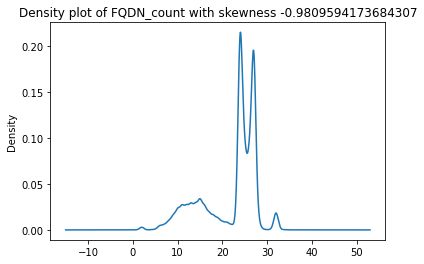

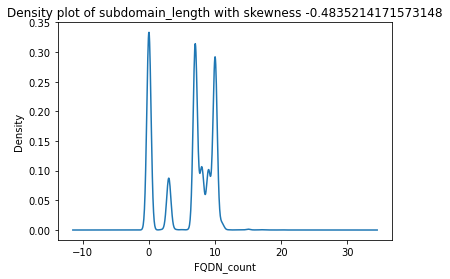

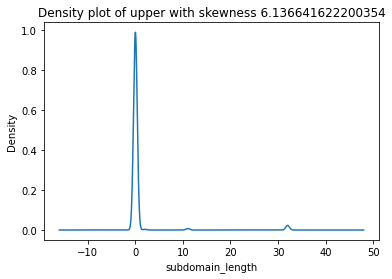

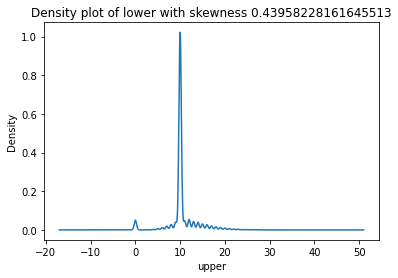

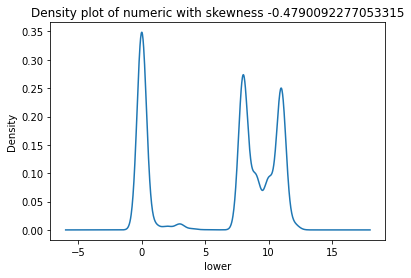

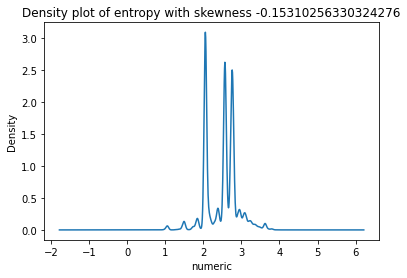

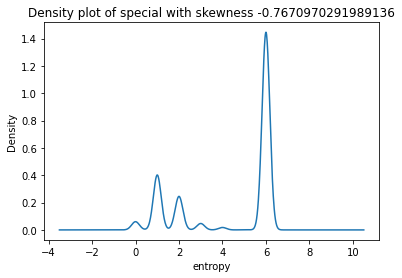

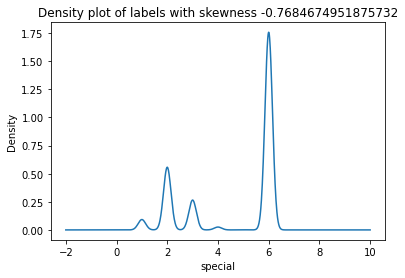

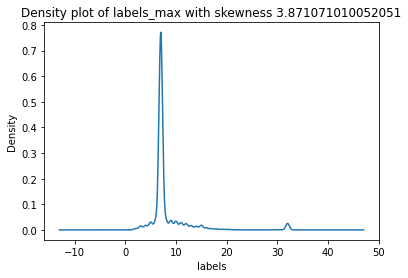

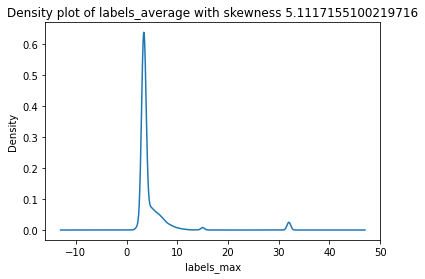

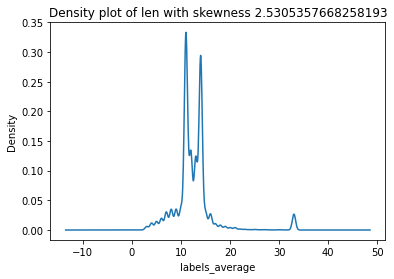

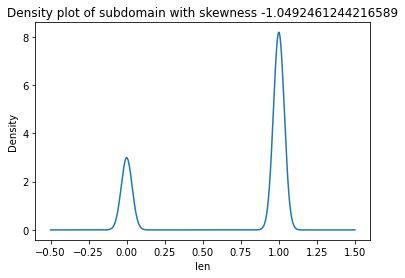

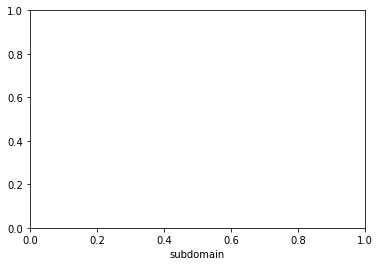

In [56]:
for i in num_cols:
  data[i].plot(kind='kde')
  plt.title("Density plot of "+ i +" with skewness "+ str(data[i].skew(axis=0)))
  plt.show()
  plt.xlabel(i)
  print('\n')

Since the data is highly skewed, it will perform badly on distance based or mostly regression based algorithms. 

Since our problem is a classification problem, our best bet will be to have a tree based model for baseline.

In [57]:
data.select_dtypes(include=["object"])

,timestamp,longest_word,sld
0,56:19.8,2,192
1,07:23.9,2,192
2,23:15.1,2,192
3,04:51.9,2,192
4,12:44.0,local,local
...,...,...,...
294353,18:59.1,nhat,nhattruyen
294354,19:28.0,mobiles,mobiles24
294355,38:53.3,2,192
294356,37:32.4,cruz,cruzroja


The column ***longest_word*** has 6220 different categories however in the following plot we see that the top 5 categories account for 70% of the data

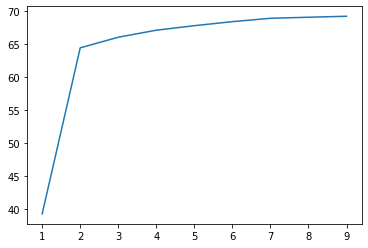

In [58]:
x,y = [],[]
feature_series = data.longest_word.value_counts()
for i in range(1,10):
  y.append(feature_series[:i].sum()/len(data) * 100)
  x.append(i)
plt.plot(x,y)

Same is for column SLD.

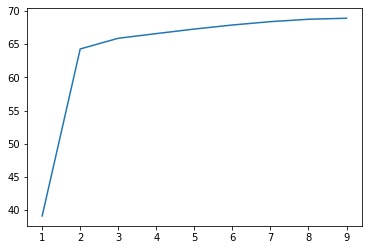

In [59]:
x,y = [],[]
feature_series = data.sld.value_counts()
for i in range(1,10):
  y.append(feature_series[:i].sum()/len(data) * 100)
  x.append(i)
plt.plot(x,y)

### Data cleansing and feature creation



Handling timestamp column

In [60]:
from pandas.core.api import to_datetime
data.timestamp =  data.timestamp.str[:-2]
data['timestamp'] = '00:' + data['timestamp'].astype(str)
data.timestamp = pd.to_datetime(data.timestamp).dt.time

In [61]:
# data['timestamp']= data['timestamp'].dt.time
data['timestamp']

0         00:56:19
1         00:07:23
2         00:23:15
3         00:04:51
4         00:12:44
            ...   
294353    00:18:59
294354    00:19:28
294355    00:38:53
294356    00:37:32
294357    00:10:29
Name: timestamp, Length: 294358, dtype: object

Timestamp here does not have a cyclic nature but instead is a series of when these attacks were encountered. The problem by logic is not of time-series analysis and hence I decided to drop this column

In [62]:
data.drop('timestamp', axis=1, inplace=True)

Heatmap for correlation between features. It can be noted here that categorical features correlation does not exist in this heatmap, hence we will be handling this later.

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

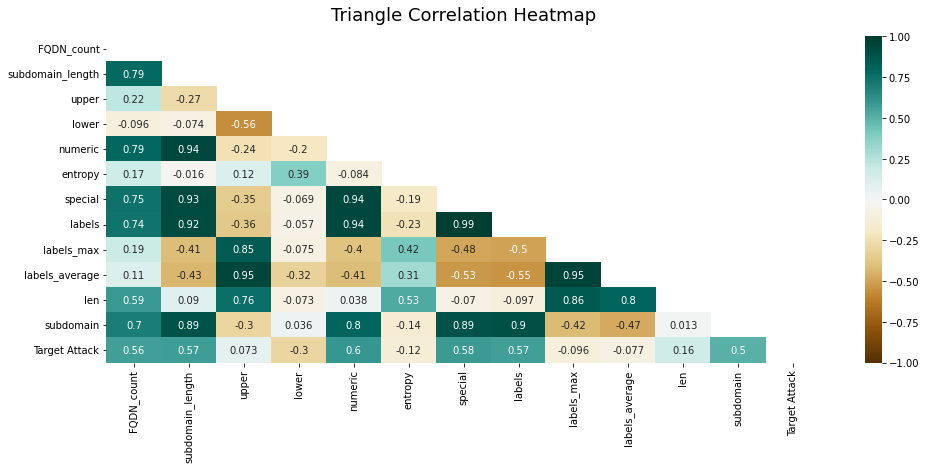

In [63]:
plt.figure(figsize=(16, 6))# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(static.corr(), dtype=np.bool))
heatmap = sns.heatmap(static.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

Columns with highest correlation with the target variable include : fqdn_count, subdomain_length, numeric, special, labels and subdomain. We are going to justify this further 

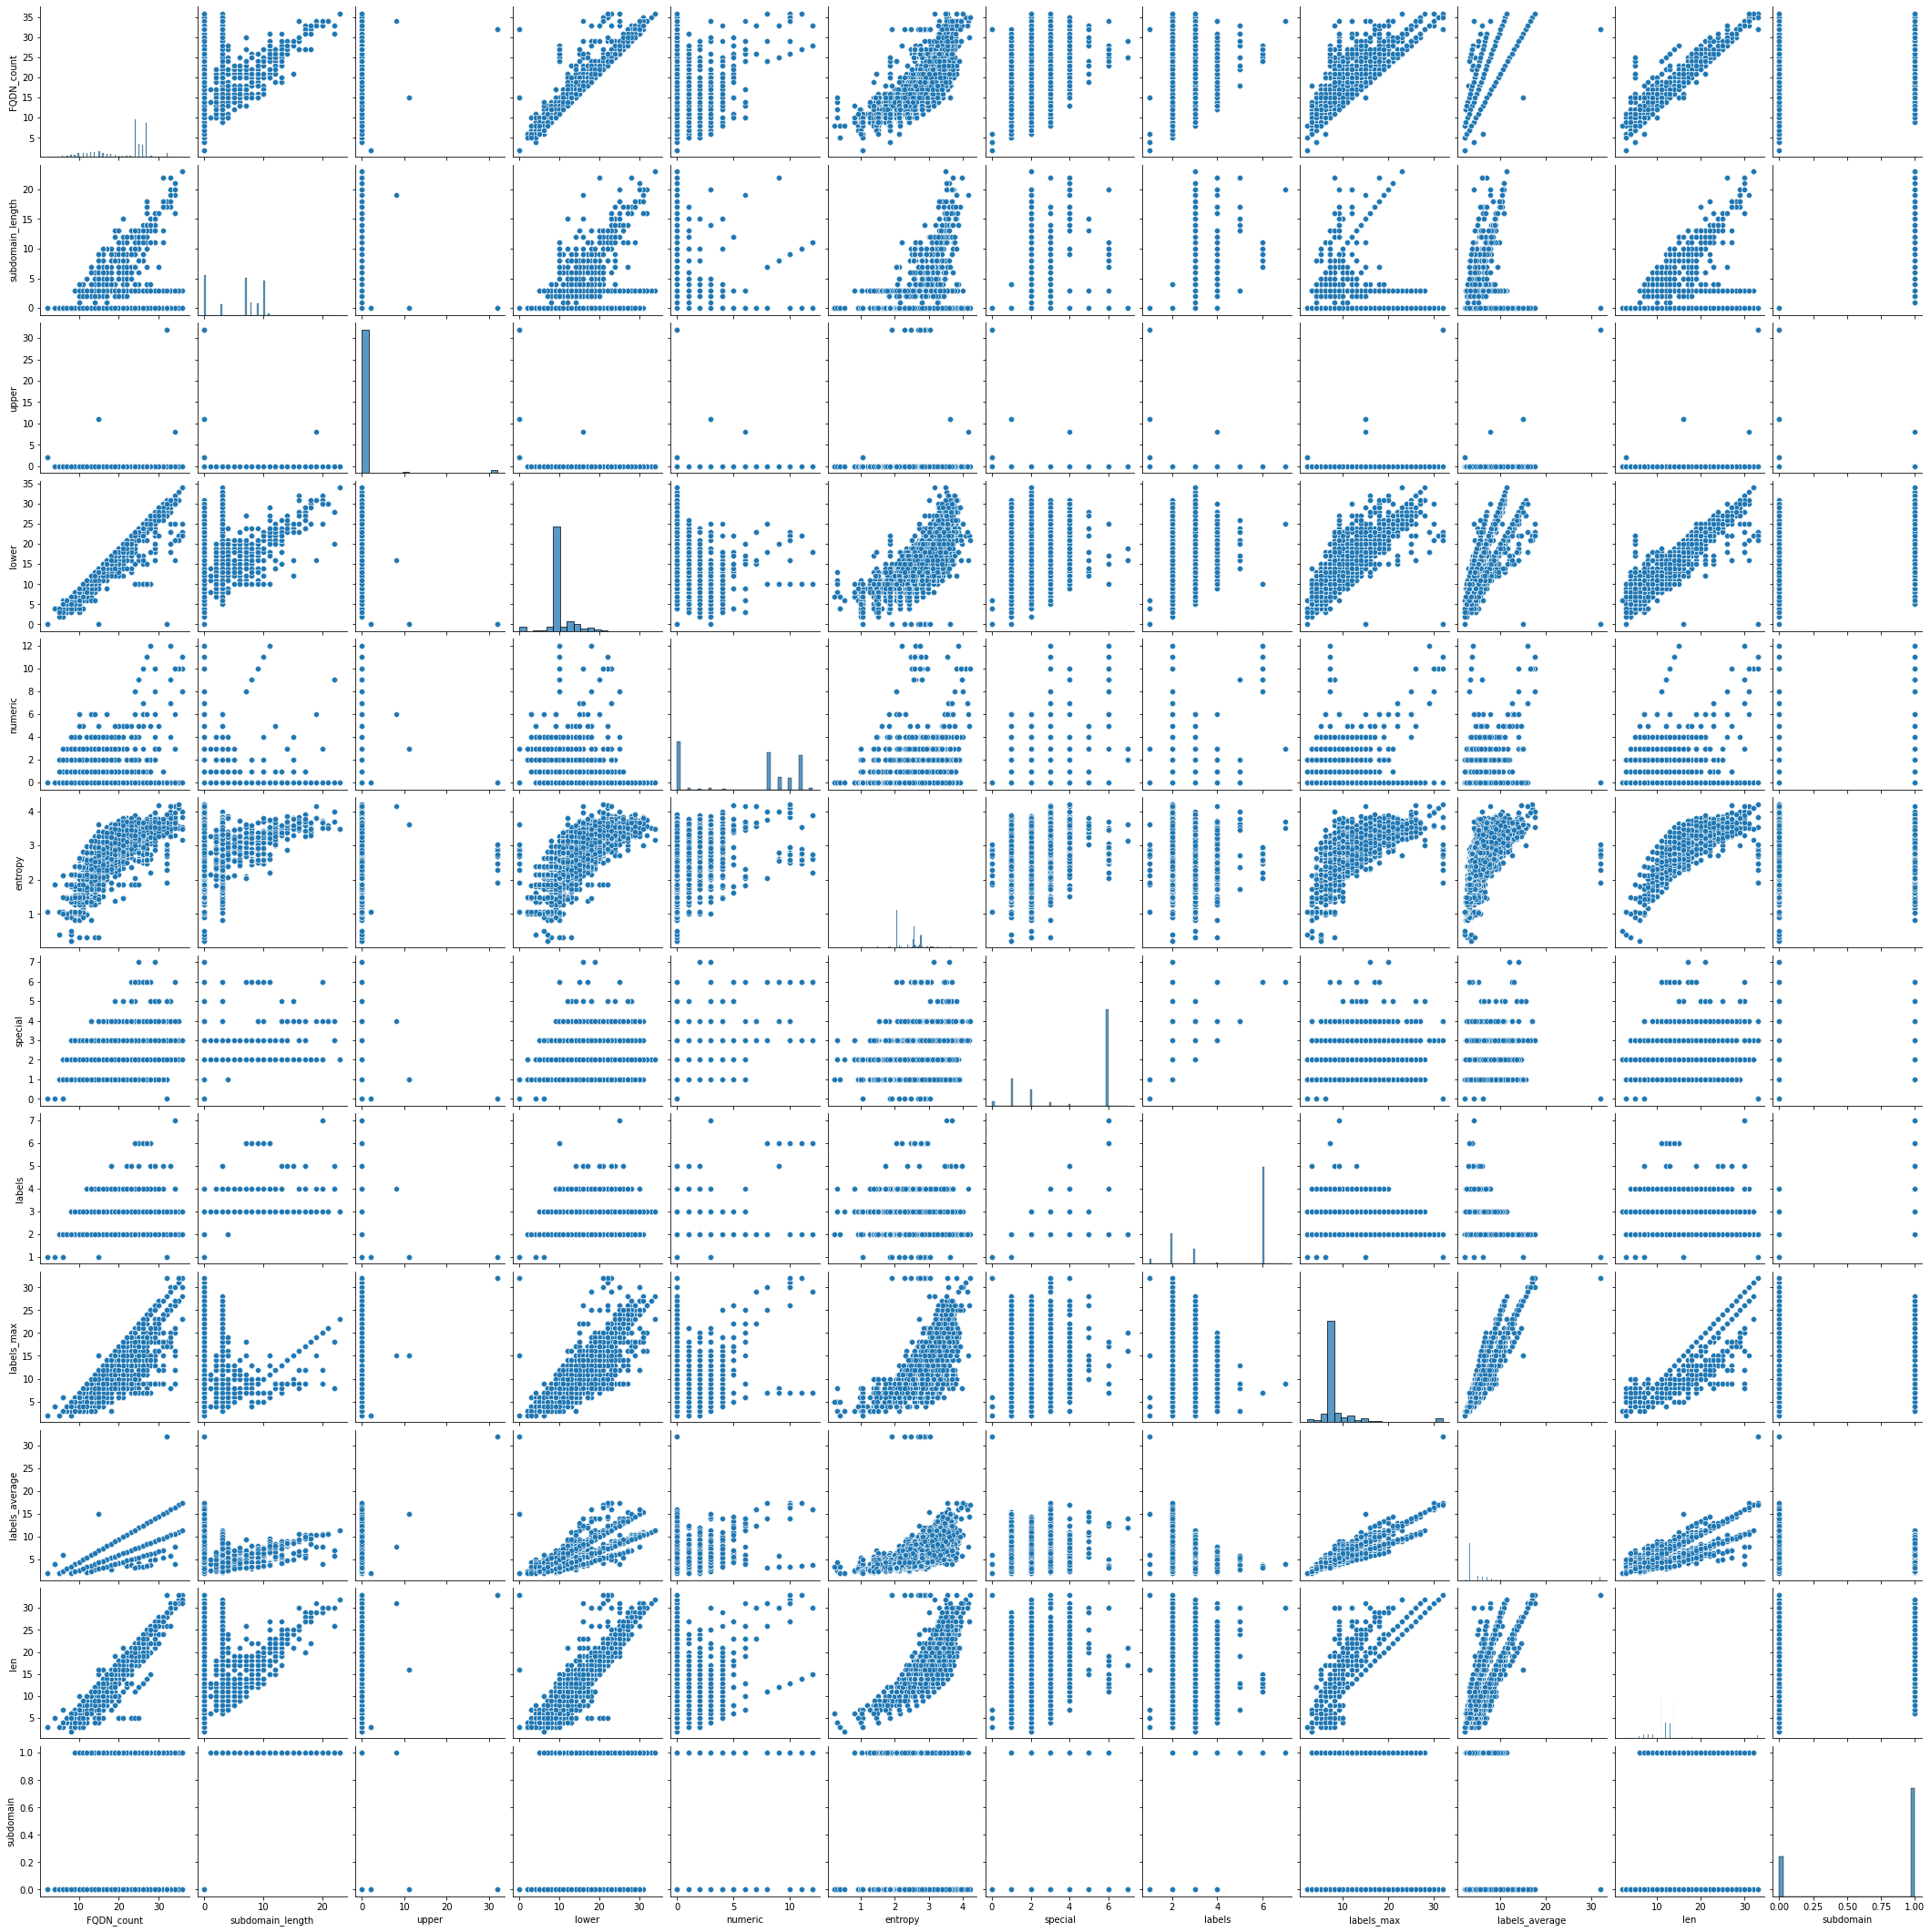

In [ ]:
import seaborn as sns


sns.pairplot(data)

Visualising correlation between feature and target for columns with highest correlation with target

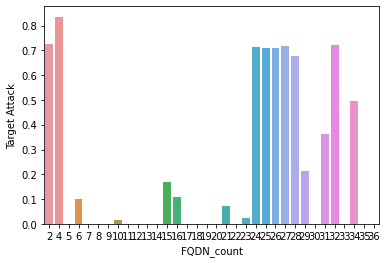

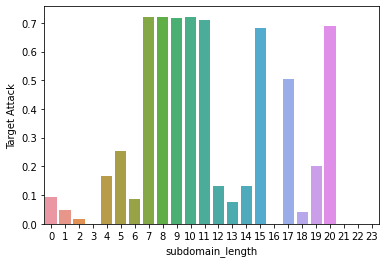

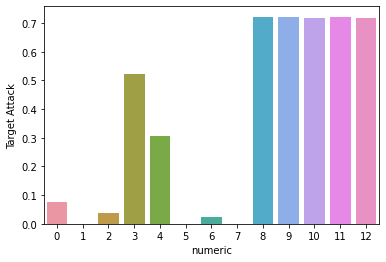

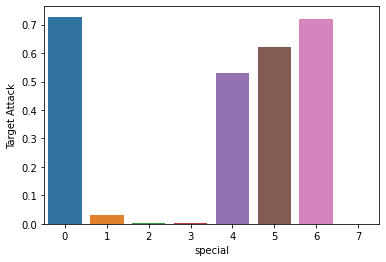

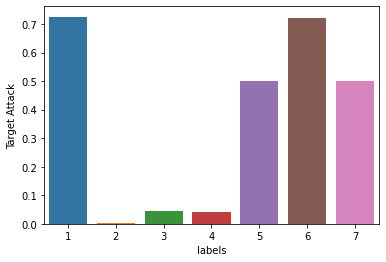

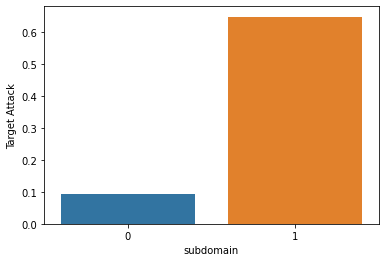

In [64]:
corr_cols = ["FQDN_count", "subdomain_length", "numeric", "special", "labels", "subdomain"]
for i in corr_cols:
  sns.barplot(x=data[i], y=labels, ci=None)
  plt.show()     

### Feature filtering with more than 2 methods

Since the longest word column has 6220 unique values, making a heatmap will be of no use. 
Using chi square test to find relationship between categorical features and target variable

In [65]:
cont_longest=pd.crosstab(data["longest_word"],labels)
cont_sld = pd.crosstab(data["sld"],labels)
cont_subdomain = pd.crosstab(data["subdomain"],labels)

In [66]:
from scipy.stats import chi2_contingency

chi2_stat1, p1, dof1, expected1 = chi2_contingency(cont_longest)
chi2_stat2, p2, dof2, expected2 = chi2_contingency(cont_sld)
chi2_stat3, p3, dof3, expected3 = chi2_contingency(cont_subdomain)
 
print(p1,p2,p3)

0.0 0.0 0.0


Hence, all these columns are significant

In [67]:
data['sld'] = data['sld'].apply(lambda x: hash(x))
data['longest_word'] = data['longest_word'].apply(lambda x: hash(x))

The main difference between CHI-SQUARE and ANOVA test is that the former is used to find the correlation between 2 'categorical' variables while the latter is used to compare means of 'numeric' features

In [68]:
from sklearn.feature_selection import SelectKBest, f_classif

data_numeric = data.drop(["longest_word", "sld", "subdomain"], axis=1)
selector = SelectKBest(f_classif, k=10)
selector.fit(data_numeric, labels)
cols = selector.get_support()
selected_columns = data_numeric.columns[cols]

In [69]:
selected_columns

Index(['FQDN_count', 'subdomain_length', 'lower', 'numeric', 'entropy',
       'special', 'labels', 'labels_max', 'labels_average', 'len'],
      dtype='object')

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

xtrain, xtest, ytrain, ytest = train_test_split(data, labels, test_size=0.2, random_state=seed_value)
kf = StratifiedKFold(n_splits=10, random_state=10, shuffle=True)
kf.get_n_splits(xtrain, ytrain)

10

In [71]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(xtrain, ytrain)
importance = dtc.feature_importances_
for i,v in enumerate(importance):
	print('Feature: ', xtrain.columns[i], "Score:", v)

Feature:  FQDN_count Score: 0.8746092285029902
Feature:  subdomain_length Score: 0.026930156864117646
Feature:  upper Score: 0.0
Feature:  lower Score: 0.03940915243879198
Feature:  numeric Score: 3.290598235174994e-05
Feature:  entropy Score: 0.00025826296200427706
Feature:  special Score: 0.002251259894919551
Feature:  labels Score: 0.0501063739645418
Feature:  labels_max Score: 0.0009674656069744744
Feature:  labels_average Score: 0.0015989614592294328
Feature:  longest_word Score: 0.000661896992320441
Feature:  sld Score: 0.0030760747158224836
Feature:  len Score: 9.818907087729281e-05
Feature:  subdomain Score: 7.154505889731442e-08


In [72]:
pd.concat([xtrain,ytrain],axis=1).corr().iloc[14]

FQDN_count          0.552001
subdomain_length    0.563659
upper               0.075308
lower              -0.290730
numeric             0.590368
entropy            -0.117415
special             0.573485
labels              0.561789
labels_max         -0.097280
labels_average     -0.078306
longest_word       -0.200538
sld                 0.236441
len                 0.159910
subdomain           0.490821
Target Attack       1.000000
Name: Target Attack, dtype: float64

Based on the calculations,  we will drop the common columns with a consistently lower score: upper, labels_average, labels_max and len. 

Note : I tried eliminating lesser columns and and removing any more columns was causing decrease in performance. Similarily, increasing them wasn't changing anything either.

In [73]:
xtrain = xtrain.drop(["upper", "labels_max", "labels_average","len", "entropy"], axis=1)
xtest = xtest.drop(["upper", "labels_max", "labels_average","len", "entropy"], axis=1)

In [74]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

minmax = StandardScaler()

xtrain = minmax.fit_transform(xtrain)
xtest = minmax.transform(xtest)


### Fitting models and comparing them

1. Logistic regression

In [94]:

algorithm_name = []
algorithm_score = []
predictions = []
algorithm_f1 = []

from sklearn.metrics import confusion_matrix, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


Logistic Regression Classification Test Accuracy 0.8046100013588803
f1 0.8352595775152166


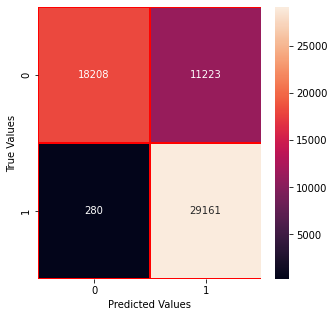

In [95]:
log_reg = LogisticRegression(random_state=seed_value)
log_reg.fit(xtrain,ytrain)
print("Logistic Regression Classification Test Accuracy" , log_reg.score(xtest,ytest))
algorithm_name.append("Logistic Regression")
algorithm_score.append(log_reg.score(xtest,ytest))

y_pred_lr = log_reg.predict(xtest)
predictions.append(y_pred_lr)
conf_mat = confusion_matrix(ytest,y_pred_lr)
print("f1", f1_score(ytest, y_pred_lr))

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Decision Tree Classification  Accuracy Score:  0.8077354260089686
f1 0.8387446041628083


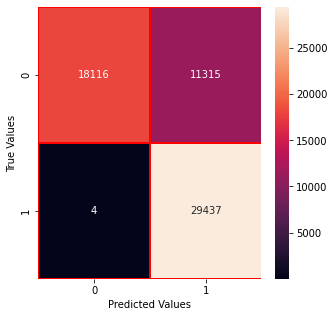

In [96]:
dec_tree = DecisionTreeClassifier(random_state=seed_value)
dec_tree.fit(xtrain,ytrain)
print("Decision Tree Classification  Accuracy Score: ",dec_tree.score(xtest,ytest))
algorithm_name.append("Decision Tree")
algorithm_score.append(dec_tree.score(xtest,ytest))

y_pred_dt = dec_tree.predict(xtest)
predictions.append(y_pred_dt)
conf_mat = confusion_matrix(ytest,y_pred_dt)
print("f1", f1_score(ytest, y_pred_dt))

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Random Forest Classification Score:  0.8077354260089686
f1 0.8387446041628083


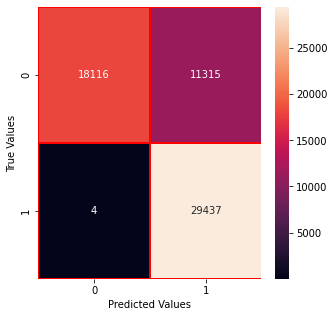

In [102]:
r_forest = RandomForestClassifier(n_estimators=64, random_state=seed_value)
r_forest.fit(xtrain,ytrain)
print("Random Forest Classification Score: ",r_forest.score(xtest,ytest))
algorithm_name.append("Random Forest")
algorithm_score.append(r_forest.score(xtest,ytest))

y_pred_rf = r_forest.predict(xtest)
predictions.append(y_pred_rf)
conf_mat = confusion_matrix(ytest,y_pred_rf)
print("f1", f1_score(ytest, y_pred_rf))

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Score for Number of Neighbors = 2: 0.6037165375730398


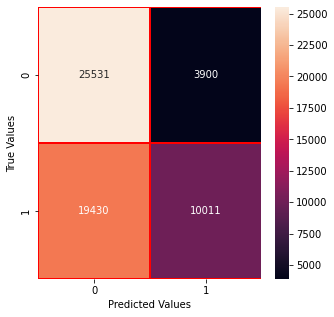

In [98]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(xtrain,ytrain)
print("Score for Number of Neighbors = 2: {}".format(knn.score(xtest,ytest)))
algorithm_name.append("KNN")
algorithm_score.append(knn.score(xtest,ytest))


y_pred_knn = knn.predict(xtest)
conf_mat = confusion_matrix(ytest,y_pred_knn)
predictions.append(y_pred_knn)

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

c:\Users\karma\Downloads\Setup_docs\venv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:29:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Decision Tree Classification Score:  0.8076844679983693
f1 0.8387087583338082


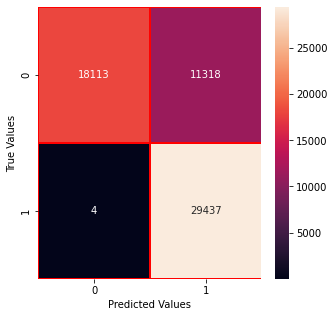

In [99]:

xgboost = XGBClassifier(random_state=seed_value)
xgboost.fit(xtrain,ytrain)
print("Decision Tree Classification Score: ",xgboost.score(xtest,ytest))
algorithm_name.append("XGBOOST")
algorithm_score.append(xgboost.score(xtest,ytest))

y_pred_xgb = xgboost.predict(xtest)
predictions.append(y_pred_xgb)
conf_mat = confusion_matrix(ytest,y_pred_xgb)
print("f1", f1_score(ytest, y_pred_xgb))

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [90]:
for i in predictions:
  algorithm_f1.append(f1_score(ytest, i))

In [91]:
algorithm_f1

[0.8352595775152166,
 0.8387446041628083,
 0.8387446041628083,
 0.46184720428123266,
 0.8387087583338082]

In [93]:
algorithm_score

[0.8352595775152166,
 0.8387446041628083,
 0.8387446041628083,
 0.46184720428123266,
 0.8387087583338082]

Text(0, 0.5, 'Score')

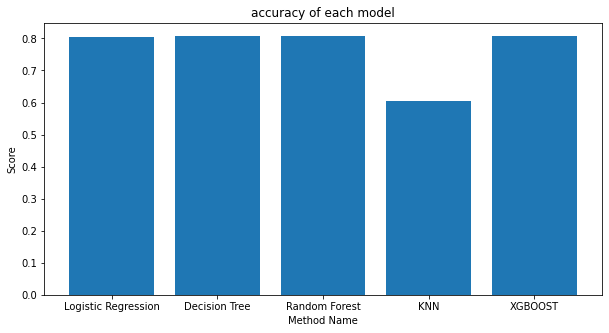

In [100]:
plt.figure(figsize=(10,5))
plt.bar(algorithm_name, algorithm_score)
plt.title('accuracy of each model')
plt.xlabel("Method Name")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

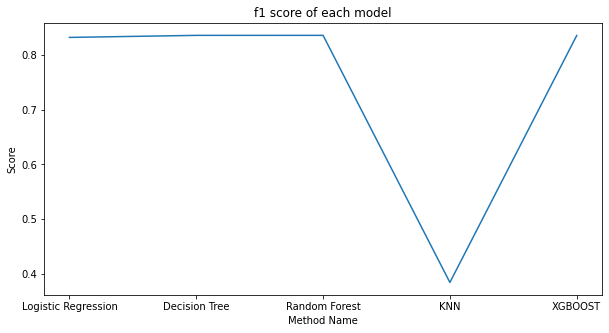

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(algorithm_name, algorithm_f1)
plt.title('f1 score of each model')
plt.xlabel("Method Name")
plt.ylabel("Score")

All the algorithms performed well apart from KNN which I did not spend time training on nearest neighbours since we had to focus on hypertuning 2 algorithms only.

The top 2 algorithms are (including only one tree based) : Random Forest and the other is logistic regression.

Tree based algorithms performed the same more or less. The reason we are going forward with that and not logistic regression because of significantly less 'False Negatives'. In our problem of detecting DNS exfiltration, it is extremely important to not have any False Negatives, wherein an attack is classified as 'not an attack'

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

max_depth=[None, 2, 8, 16]
n_estimators = [64, 128, 256]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

dfrst = RandomForestClassifier(criterion='entropy')
grid = GridSearchCV(estimator=dfrst, param_grid=param_grid, cv = kf, verbose=10, scoring='f1')
grid_results = grid.fit(xtrain, ytrain)

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
results_df = pd.DataFrame(grid_results.cv_results_)
results_df

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10; 1/12] START max_depth=None, n_estimators=64...........................
[CV 1/10; 1/12] END max_depth=None, n_estimators=64;, score=0.838 total time=  17.9s
[CV 2/10; 1/12] START max_depth=None, n_estimators=64...........................
[CV 2/10; 1/12] END max_depth=None, n_estimators=64;, score=0.834 total time=  18.2s
[CV 3/10; 1/12] START max_depth=None, n_estimators=64...........................
[CV 3/10; 1/12] END max_depth=None, n_estimators=64;, score=0.838 total time=  12.8s
[CV 4/10; 1/12] START max_depth=None, n_estimators=64...........................
[CV 4/10; 1/12] END max_depth=None, n_estimators=64;, score=0.840 total time=  16.5s
[CV 5/10; 1/12] START max_depth=None, n_estimators=64...........................
[CV 5/10; 1/12] END max_depth=None, n_estimators=64;, score=0.840 total time=  15.5s
[CV 6/10; 1/12] START max_depth=None, n_estimators=64...........................
[CV 6/10; 1/12] END max_de

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,14.137560,2.413503,0.193499,0.030071,None,64,"{'max_depth': None, 'n_estimators': 64}",0.838074,0.833859,0.838021,0.839830,0.839688,0.837262,0.837448,0.838707,0.838517,0.839220,0.838062,0.001625,1
1,27.674110,2.759388,0.472724,0.230050,None,128,"{'max_depth': None, 'n_estimators': 128}",0.838074,0.833859,0.837897,0.839830,0.839688,0.837262,0.837448,0.838707,0.838576,0.839220,0.838056,0.001628,4
2,49.231033,3.958306,0.685635,0.106580,None,256,"{'max_depth': None, 'n_estimators': 256}",0.838074,0.833859,0.837897,0.839830,0.839688,0.837262,0.837448,0.838749,0.838517,0.839220,0.838054,0.001628,5
3,5.688198,0.368604,0.124890,0.021462,2,64,"{'max_depth': 2, 'n_estimators': 64}",0.828330,0.825897,0.833381,0.832448,0.830122,0.827753,0.831413,0.832176,0.829829,0.827706,0.829905,0.002325,12
4,12.961322,1.252057,0.274958,0.060810,2,128,"{'max_depth': 2, 'n_estimators': 128}",0.833548,0.824274,0.829562,0.831743,0.835638,0.827753,0.830610,0.834051,0.833860,0.829464,0.831050,0.003261,10
5,23.482768,2.151494,0.519919,0.124111,2,256,"{'max_depth': 2, 'n_estimators': 256}",0.833548,0.825897,0.829562,0.831743,0.832075,0.830391,0.830610,0.831632,0.827286,0.833920,0.830666,0.002417,11
6,11.538852,2.250257,0.177547,0.040536,8,64,"{'max_depth': 8, 'n_estimators': 64}",0.837938,0.833735,0.837388,0.839706,0.839499,0.837292,0.837004,0.838365,0.838482,0.838588,0.837800,0.001598,9
7,20.412494,1.656126,0.293645,0.024592,8,128,"{'max_depth': 8, 'n_estimators': 128}",0.837938,0.833682,0.837678,0.839706,0.839499,0.837292,0.837282,0.838530,0.838482,0.839167,0.837926,0.001636,8
8,41.362582,3.174590,0.648882,0.083456,8,256,"{'max_depth': 8, 'n_estimators': 256}",0.837938,0.833764,0.837678,0.839706,0.839499,0.837292,0.837241,0.838530,0.838452,0.839167,0.837927,0.001615,7
9,13.317563,1.436450,0.189937,0.050097,16,64,"{'max_depth': 16, 'n_estimators': 64}",0.838074,0.833859,0.837897,0.839830,0.839688,0.837262,0.837448,0.838749,0.838576,0.839220,0.838060,0.001630,2


After grid search, max_depth none and n_estimators=64 gave me the best model

Hence, I have exported the RF model with the above parameters.

### Exporting model and scaler

In [ ]:
import joblib
scaler_name = "scaler.bin"
joblib.dump(minmax, scaler_name)

In [ ]:
import pickle 
filename = 'finalized_model.sav'
pickle.dump(r_forest, open(filename, 'wb'))